<a href="https://colab.research.google.com/github/ibnuhajar/TrainingMachineLearning/blob/main/TraineKerasTensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

print(tf.__version__)

2.3.0


In [4]:
    !wget --no-check-certificate \
      https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/messy-vs-clean-room.zip \
      -O /tmp/messy_vs_clean_room.zip

--2020-10-16 08:57:40--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/messy-vs-clean-room.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70392746 (67M) [application/zip]
Saving to: ‘/tmp/messy_vs_clean_room.zip’

/tmp/messy_vs_clean 100%[===================>]  67.13M  12.0MB/s    in 8.4s    

2020-10-16 08:57:49 (7.98 MB/s) - ‘/tmp/messy_vs_clean_room.zip’ saved [70392746/70392746]



In [5]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/messy_vs_clean_room.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/images'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'val')

In [6]:
os.listdir('/tmp/images/train')

['clean', 'messy']

In [ ]:
os.listdir('/tmp/images/val')

['clean', 'messy']

In [ ]:
# membuat direktori ruangan rapi pada direktori data training
train_clean_dir = os.path.join(train_dir,'clean')

# membuat direktori ruangan berantakan pada direktori data training
train_messy_dir = os.path.join(train_dir, 'messy')

# membuat direktori ruangan rapi pada direktori data validasi
validation_clean_dir = os.path.join(validation_dir, 'clean')

# membuat direktori ruangan berantakan pada direktori data validasi
validation_messy_dir = os.path.join(validation_dir, 'messy')

In [7]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

test_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

In [8]:
train_generator = train_datagen.flow_from_directory(
    train_dir, # direktori data latih 
    target_size = (150,150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
    batch_size = 4, # karena kita merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary
    class_mode = 'binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir, # direktori data validasi
    target_size = (150,150), # mengubah resulusi seluruh gambar menjadi 150x150 piksel
    batch_size = 4, # karena kita merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
    class_mode = 'binary'
)

Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [9]:
model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32,(3,3),activation='relu', input_shape=(150,150,3)),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512,activation='relu'),
      tf.keras.layers.Dense(1,activation='sigmoid')
])

In [11]:
# compile model dengan 'adam' optimizzer loss function 'binary_crossentropy'
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics = ['accuracy'])

In [13]:
# latih model dengan model.fit
model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps= 5,
    verbose=2
)

Epoch 1/20
25/25 - 6s - loss: 0.7061 - accuracy: 0.4900 - val_loss: 0.6910 - val_accuracy: 0.5000
Epoch 2/20
25/25 - 6s - loss: 0.6987 - accuracy: 0.4600 - val_loss: 0.6909 - val_accuracy: 0.5000
Epoch 3/20
25/25 - 6s - loss: 0.7013 - accuracy: 0.6000 - val_loss: 0.6896 - val_accuracy: 0.6000
Epoch 4/20
25/25 - 6s - loss: 0.6852 - accuracy: 0.6600 - val_loss: 0.5605 - val_accuracy: 0.7000
Epoch 5/20
25/25 - 6s - loss: 0.6045 - accuracy: 0.6800 - val_loss: 0.4129 - val_accuracy: 0.8500
Epoch 6/20
25/25 - 6s - loss: 0.6462 - accuracy: 0.6600 - val_loss: 0.6508 - val_accuracy: 0.5000
Epoch 7/20
25/25 - 6s - loss: 0.6885 - accuracy: 0.5300 - val_loss: 0.6239 - val_accuracy: 0.7500
Epoch 8/20
25/25 - 6s - loss: 0.6101 - accuracy: 0.6700 - val_loss: 0.5115 - val_accuracy: 0.7500
Epoch 9/20
25/25 - 6s - loss: 0.6277 - accuracy: 0.6600 - val_loss: 0.5710 - val_accuracy: 0.6000
Epoch 10/20
25/25 - 6s - loss: 0.6058 - accuracy: 0.6600 - val_loss: 0.5015 - val_accuracy: 0.8000
Epoch 11/20
25/25 -

Saving DSC_0058.JPG to DSC_0058 (1).JPG
DSC_0058.JPG
messy


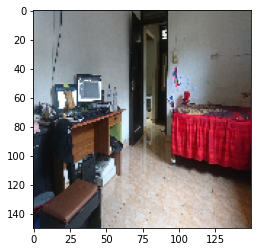

In [16]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path,target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images,batch_size=10)

  print(fn)
  if classes==0:
    print('clean')
  else:
    print('messy')